### Import modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Read Image Function

In [ ]:
def Read_img(path):
    img= open(path,"r")
    g= img.readline()
    c= img.readline()
    rc= img.readline()
    max= int(img.readline())
    
    [col,row]=[int (i) for i in rc.split()]
    k=np.zeros((row,col),np.int64)  #Arry to store all image pixels
    for i in range (row):
        for j in range(col):
            k[i,j]=img.readline()
    
    img.close()
    plt.imshow(k,cmap='gray')
    return k,g,c,rc,max,col,row

### Store/Write O/p Image Function

In [ ]:
def Write_img(path,k,g,c,rc,max,col,row):
    img= open(path,"w")
    img.write(g)
    img.write(c)
    img.write(rc)
    img.write(str(max)+"\n")
    
    for i in range(row):
        for j in range(col):
            img.write("%d\n"%k[i,j])
    plt.imshow(k,cmap='gray')
    img.close()

### Function used for padding

In [ ]:
def add_padding(arr,row,col,k_row,k_col):
    r_pd_size= (k_row-1)//2
    c_pd_size= (k_col-1)//2
    n_row=row+r_pd_size*2
    n_col=col+c_pd_size*2
    new_arr= np.zeros((n_row,n_col),np.int64)
    for i in range(r_pd_size,row+r_pd_size):
        for j in range(c_pd_size,col+c_pd_size):
            new_arr[i,j]=arr[i-r_pd_size,j-c_pd_size]
    return new_arr,n_row,n_col

### Line Detection

In [ ]:
def line_detection(arr,row,col,kernel):
    k_row,k_col=kernel.shape
    padded_img,n_row,n_col= add_padding(arr,row,col,k_row,k_col)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            temp= np.rint(np.sum(padded_img[i:i+k_row, j:j+k_col] * kernel))
            if(temp<0):
                temp=0
            result[i, j]=temp
    return result

### Point Detection

In [ ]:
def point_detection(arr,row,col,t):
    kernel=np.array([[1,1,1],[1,-8,1],[1,1,1]])
    k_row,k_col=kernel.shape
    padded_img,n_row,n_col= add_padding(arr,row,col,k_row,k_col)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            temp= np.rint(np.sum(padded_img[i:i+k_row, j:j+k_col] * kernel))
            if(temp>t):
                result[i, j]=1
            else:
                result[i,j]=0
    return result

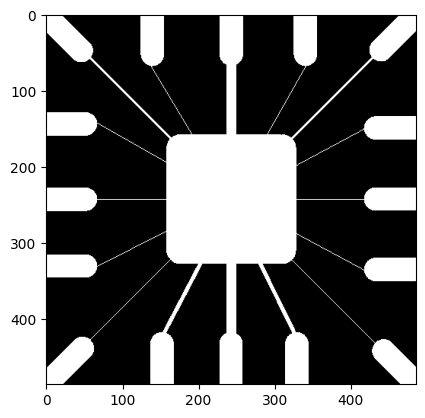

In [30]:
k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH09\Fig0905(a)(wirebond-mask).pgm")

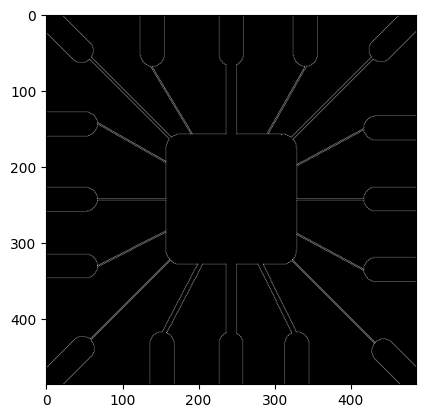

In [31]:
kernel=np.array([[0,1,0],[1,-4,1],[0,1,0]]) #detect all lines
result=line_detection(k1,row1,col1,kernel)
plt.imshow(result,cmap='gray')

In [ ]:
kernel=np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]]) #detect virtical lines
result=line_detection(k1,row1,col1,kernel)
plt.imshow(result,cmap='gray')

In [ ]:
kernel=np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]]) #detect +45 degree lines
result=line_detection(k1,row1,col1,kernel)
plt.imshow(result,cmap='gray')

In [ ]:
kernel=np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]]) #detect Horizontal lines
result=line_detection(k1,row1,col1,kernel)
plt.imshow(result,cmap='gray')

In [ ]:
kernel=np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]]) #detect +45 degree lines
result=line_detection(k1,row1,col1,kernel)
plt.imshow(result,cmap='gray')

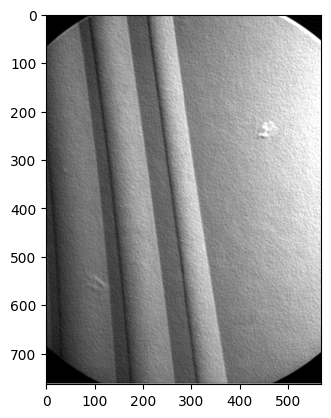

In [29]:
k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH10\Fig1004(b)(turbine_blade_black_dot).pgm")

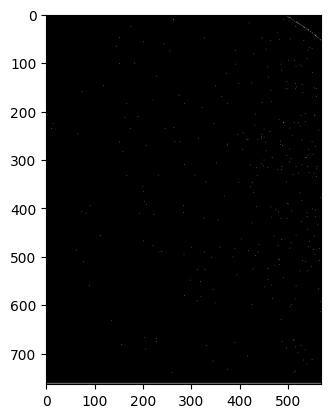

In [27]:
#point detection
result=point_detection(k1,row1,col1,220)
plt.imshow(result,cmap='gray')